In [1]:
import os 
new_path = "C:/Users/LOQ/OneDrive/Desktop/data science/project1"
os.chdir(new_path)

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing


In [3]:
raw_data = pd.read_csv("online_retail.csv")

In [4]:
df = raw_data.copy()

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.shape

(541909, 8)

In [9]:
df = df.dropna(subset=['CustomerID'])

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df['Total Price '] = df['Quantity'] * df['UnitPrice']

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
df.shape

(397924, 9)

In [16]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
count,397924,397924,397924,397924.000000,397924,397924.000000,397924.000000,397924,397924.000000
unique,18536,3665,3877,NaN,NaN,NaN,NaN,37,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN
freq,542,2035,2028,NaN,NaN,NaN,NaN,354345,NaN
mean,NaN,NaN,NaN,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171,NaN,22.394749
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN,0.000000
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,NaN,4.680000
50%,NaN,NaN,NaN,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,NaN,11.800000
75%,NaN,NaN,NaN,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,NaN,19.800000
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,NaN,168469.600000


## Checkpoint : RFM calculation

In [17]:
import datetime as dt 

snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [18]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'Total Price ' : 'sum'                                      # Monetary
}).reset_index()

In [19]:
rfm.columns = ['CustomerId', 'Recency', 'Frequency', 'Monetary']

In [20]:
rfm.head()

,CustomerId,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [21]:
rfm.describe()

,CustomerId,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.518322,4.271952,2053.793018
std,1721.889758,100.009747,7.705493,8988.248381
min,12346.000000,1.000000,1.000000,0.000000
25%,13812.500000,18.000000,1.000000,307.245000
50%,15299.000000,51.000000,2.000000,674.450000
75%,16778.500000,142.000000,5.000000,1661.640000
max,18287.000000,374.000000,210.000000,280206.020000


In [22]:
import numpy as np

rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(lambda x: np.log1p(x))

from scipy.stats import skew

In [23]:
print("Skew Before:", rfm[['Recency', 'Frequency', 'Monetary']].apply(skew))

Skew Before: Recency       1.245926
Frequency    12.095844
Monetary     19.320303
dtype: float64


In [24]:
print("Skew After:", rfm_log.apply(skew))

Skew After: Recency     -0.378546
Frequency    1.208499
Monetary     0.360438
dtype: float64


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm_log.columns, index=rfm_log.index)

rfm_scaled_df.head()

,Recency,Frequency,Monetary
0,1.462236,-0.955013,3.696168
1,-2.038611,1.074523,1.408758
2,0.373310,0.386437,0.715517
3,-0.622914,-0.955013,0.697821
4,1.424800,-0.955013,-0.615877


c:\Users\LOQ\anaconda3\envs\datascience_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\LOQ\anaconda3\envs\datascience_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\LOQ\anaconda3\envs\datascience_env\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\LOQ\anaconda3\envs\datascience_env\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\LOQ\anaconda3\envs\datascience_env\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pi

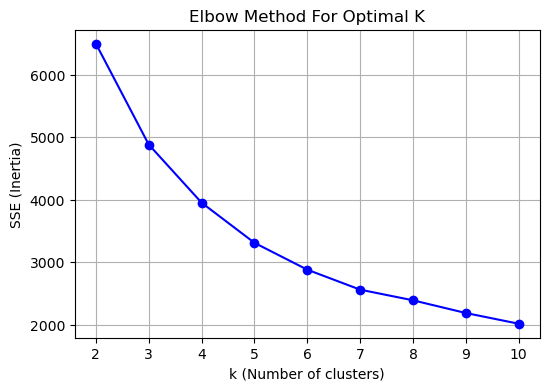

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
x = rfm_scaled_df[['Recency', 'Frequency', 'Monetary']]

sse = []
K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, sse, 'bo-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

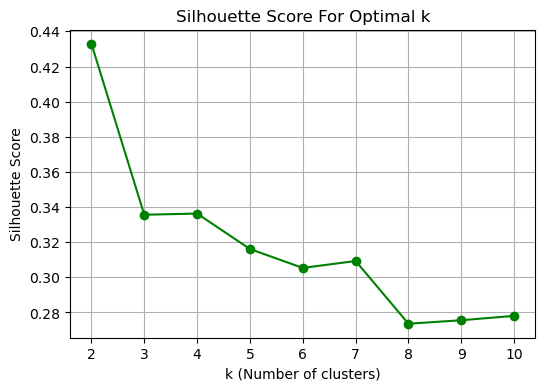

In [27]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = rfm_scaled_df[['Recency', 'Frequency', 'Monetary']]

silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid(True)
plt.show()


In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_scaled_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']])

In [43]:
rfm_scaled_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,-0.821476,-0.397338,-0.417586
1,-1.247576,1.649590,1.391846
2,0.131451,0.320907,0.518215
3,0.900696,-0.777239,-0.796109


In [44]:
segment_labels = {
    0: "New customers",
    1: "Champions",
    2: "Potential Loyalists",
    3: "At Risk"
}

rfm['Segment'] = rfm_scaled_df['Cluster'].map(segment_labels)
rfm

,CustomerId,Recency,Frequency,Monetary,Segment
0,12346.0,326,1,77183.60,Potential Loyalists
1,12347.0,2,7,4310.00,Champions
2,12348.0,75,4,1797.24,Potential Loyalists
3,12349.0,19,1,1757.55,New customers
4,12350.0,310,1,334.40,At Risk
...,...,...,...,...,...
4334,18280.0,278,1,180.60,At Risk
4335,18281.0,181,1,80.82,At Risk
4336,18282.0,8,2,178.05,New customers
4337,18283.0,4,16,2094.88,Champions


In [45]:
rfm['Segment'].value_counts()

Segment
At Risk                1594
Potential Loyalists    1183
New customers           839
Champions               723
Name: count, dtype: int64

C:\Users\LOQ\AppData\Local\Temp\ipykernel_4536\2439379812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='viridis')


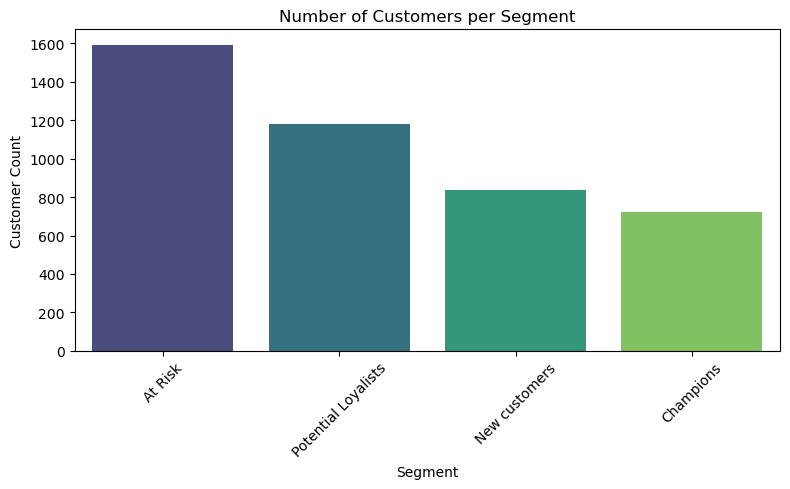

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'rfm' is your DataFrame and it has a 'Segment' column
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='viridis')
plt.title('Number of Customers per Segment')
plt.xlabel('Segment')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


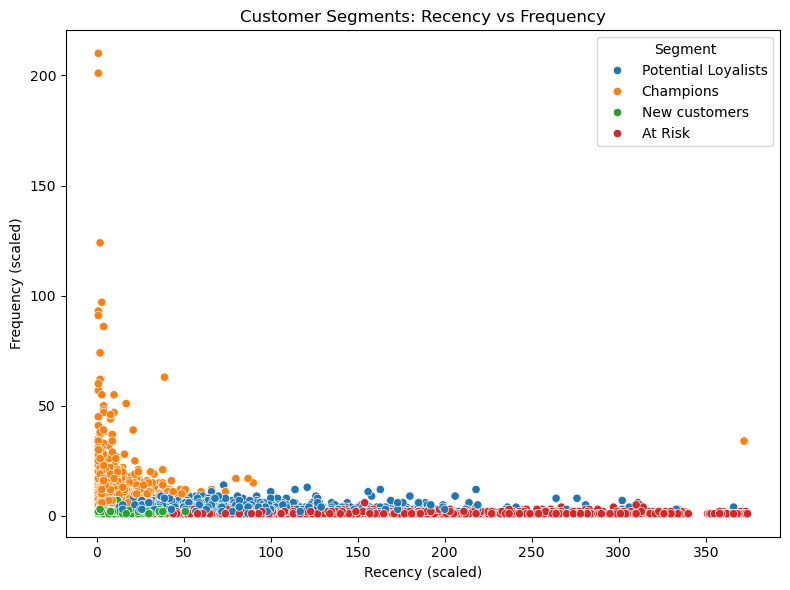

In [48]:
# Example: Recency vs Frequency colored by Segment
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='tab10')
plt.title('Customer Segments: Recency vs Frequency')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


In [59]:
segment_summary = rfm.groupby('Segment').agg({
    'Recency' : ['mean', 'min', 'max'],
    'Frequency' : ['mean', 'min', 'max'],
    'Monetary' : ['mean', 'min', 'max'],
    'CustomerId' : 'count'
 }).round(2)

segment_summary.columns = ['_'.join(col) for col in segment_summary.columns]
segment_summary = segment_summary.rename(columns={'CustomerID_count': 'Customer_count'})
segment_summary = segment_summary.reset_index()


In [60]:
segment_summary

,Segment,Recency_mean,Recency_min,Recency_max,Frequency_mean,Frequency_min,Frequency_max,Monetary_mean,Monetary_min,Monetary_max,CustomerId_count
0,At Risk,184.02,14,374,1.32,1,6,342.42,0.00,2169.39,1594
1,Champions,12.11,1,372,13.63,2,210,8015.42,808.62,280206.02,723
2,New customers,18.73,1,53,2.09,1,7,538.23,30.00,3861.00,839
3,Potential Loyalists,70.70,8,366,4.08,1,14,1791.09,322.41,77183.60,1183


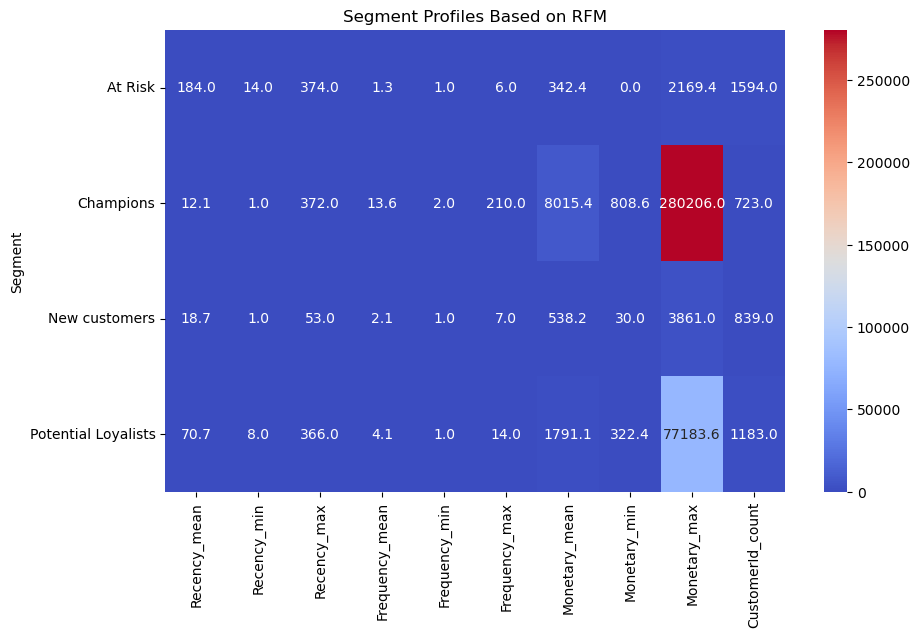

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap-style visualization of segments
plt.figure(figsize=(10, 6))
sns.heatmap(segment_summary.drop(columns='Segment').set_index(segment_summary['Segment']), annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Segment Profiles Based on RFM")
plt.show()


### 🎯 Customer Segment Targeting Strategy

| Segment             | Key Traits                                      | Recommended Strategy                                                                 |
|---------------------|--------------------------------------------------|---------------------------------------------------------------------------------------|
| **Champions**       | High Frequency, High Monetary, Recent Purchases | - Reward loyalty with VIP perks and early access<br>- Ask for reviews/referrals<br>- Keep engaged consistently |
| **Potential Loyalists** | Frequent buyers, growing spend, less recent | - Re-engage via personalized emails or offers<br>- Introduce loyalty programs<br>- Promote relevant products |
| **New Customers**   | Recent purchases, low spend, low frequency      | - Guide onboarding with welcome emails<br>- Offer first-time purchase deals<br>- Educate on product value |
| **At Risk**         | Not recent, low spend, low frequency            | - Launch win-back campaigns<br>- Provide time-sensitive discounts<br>- Gather feedback to improve retention |


In [63]:
rfm['Cluster'] = kmeans.labels_
rfm

,CustomerId,Recency,Frequency,Monetary,Segment,Cluster
0,12346.0,326,1,77183.60,Potential Loyalists,2
1,12347.0,2,7,4310.00,Champions,1
2,12348.0,75,4,1797.24,Potential Loyalists,2
3,12349.0,19,1,1757.55,New customers,0
4,12350.0,310,1,334.40,At Risk,3
...,...,...,...,...,...,...
4334,18280.0,278,1,180.60,At Risk,3
4335,18281.0,181,1,80.82,At Risk,3
4336,18282.0,8,2,178.05,New customers,0
4337,18283.0,4,16,2094.88,Champions,1


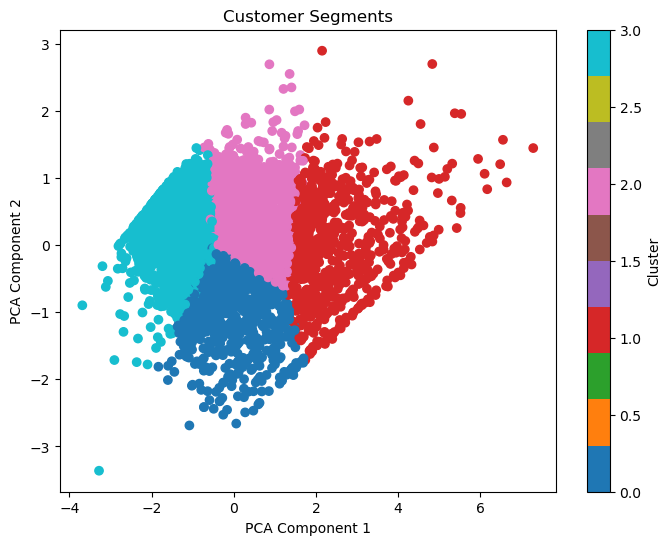

In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=rfm['Cluster'], cmap='tab10')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [66]:
rfm.to_csv('clustered_customers.csv', index=False)